# Making dataset

In [1]:
from PIL import Image
import os, glob, numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
caltech_dir = "./dataset_image"
categories = ['0. aqua','1. black', '2. blue', '3. fuchsia', '4. green', '5. lime', '6. maroon', '7. navy', '8. red', '9. white', '10. yellow']

In [7]:
image_w = 128
image_h = 128

In [8]:
X = []
y = []

In [6]:
for idx, cat in enumerate(categories):

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        try:
            img = Image.open(f)
            img = img.convert("RGBA")
            img = img.resize((image_w, image_h))
            data = img.getdata()
        except Exception as e:
            pass

        X.append(data)
        y.append(idx)

print("ok", len(y))

0. aqua  파일 길이 :  100
1. black  파일 길이 :  100
2. blue  파일 길이 :  100
3. fuchsia  파일 길이 :  100
4. green  파일 길이 :  100
5. lime  파일 길이 :  100
6. maroon  파일 길이 :  100
7. navy  파일 길이 :  100
8. red  파일 길이 :  100
9. white  파일 길이 :  100
10. yellow  파일 길이 :  100
ok 1100


In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
np.save("./100_clothing_img", X)
np.save("./100_clothing_color", y)

# Images in dataset

In [11]:
import matplotlib.pyplot as plt
import cv2

In [12]:
dirs = []

In [16]:
for idx, cat in enumerate(categories):
    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    for i in range(len(files)):
        dirs.append(files[i])

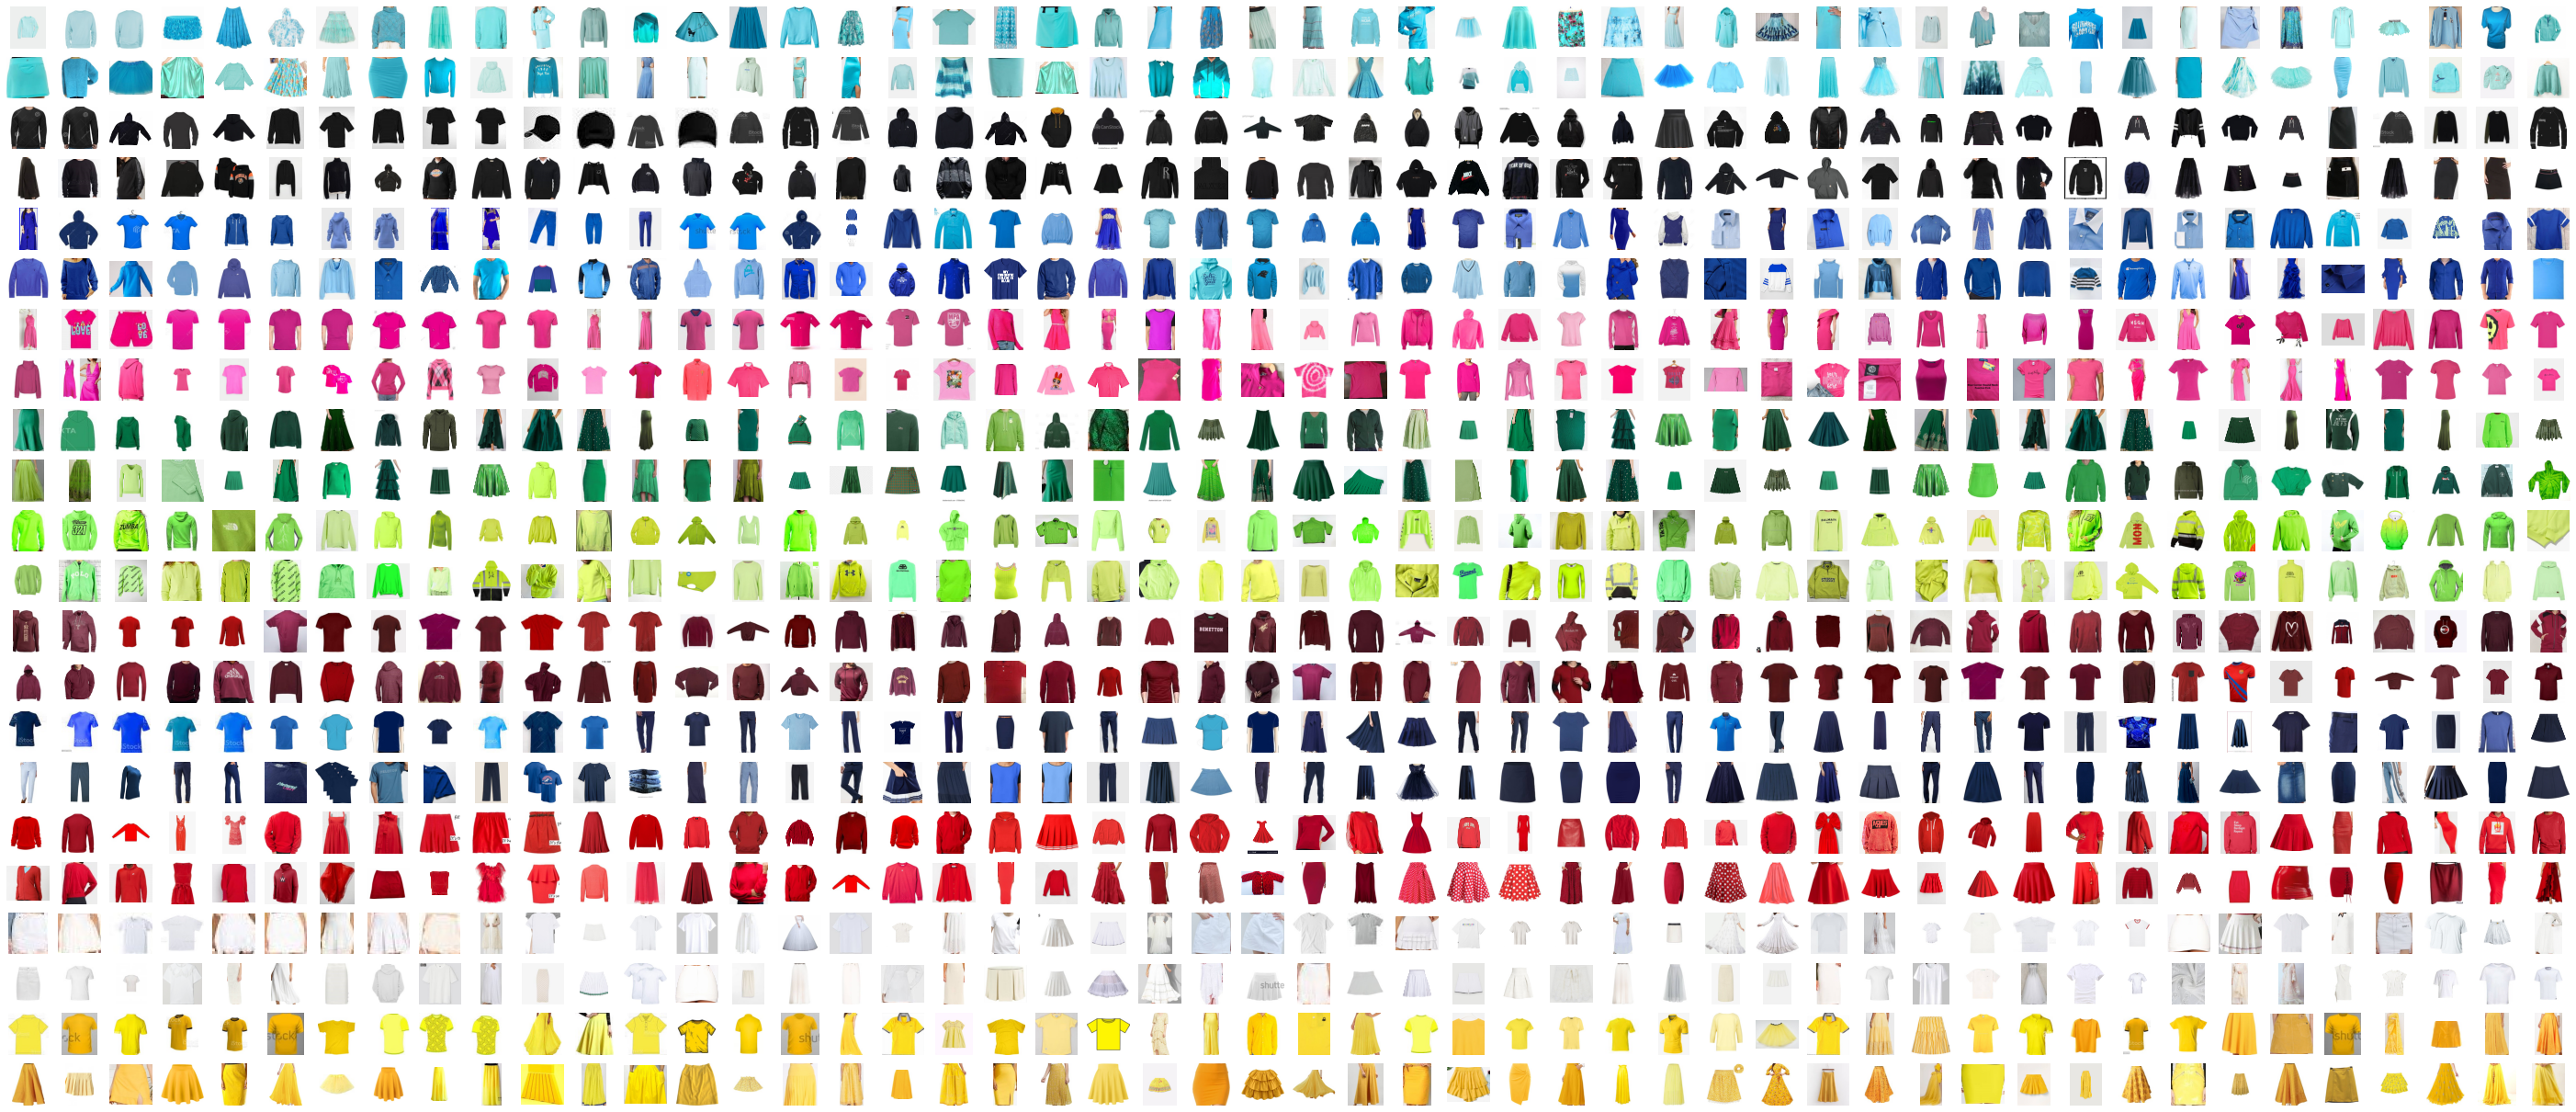

In [17]:
fig = plt.figure(figsize=(50, 22))

for i in range(1100):
    img = cv2.imread(dirs[i])
        
    ax = fig.add_subplot(22, 50, i + 1)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)
    ax.axis("off")
        
plt.savefig("./images.png")
plt.show()